In [1]:
#mount google drive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

%cd gdrive/MyDrive/CS449Project

Mounted at /content/gdrive/
/content/gdrive/.shortcut-targets-by-id/1jFmtu6VS9j4_8QNgIiekCUMOkuw8r7G6/CS449Project


In [2]:

!pip install pytorch-fid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install torch-fidelity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 5.6 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torchmetrics.image.fid import FrechetInceptionDistance
import torchmetrics

Source: [FID Documentation link](https://torchmetrics.readthedocs.io/en/stable/image/frechet_inception_distance.html)

### Section 1: Show Images we Compared

In this section we load in the relevant images and display a subset of the images we plan to compare.

In [6]:
displayTransform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor()])
realImage = datasets.ImageFolder('data/test_folder/', displayTransform)

genImage = datasets.ImageFolder('results_conditional_150/FinalResults', displayTransform)

genUImage = datasets.ImageFolder('results_unconditional_150', displayTransform) 

genHyperparamImage = datasets.ImageFolder('results_500diffSteps/FinalResults', displayTransform) 

In [7]:
#load in data 
import random
realImgX = []
genImgX = []
genUImgX = []
genHPImgX = []


randIndices = random.sample(range(0,500), 150) #randomly select images from the testing folder to compare to 

for i in randIndices:
  realImgX.append((realImage[i][0]).numpy())

for i in genImage:
  genImgX.append((i[0]).numpy())

for i in genUImage:
  genUImgX.append((i[0]).numpy())

for i in genHyperparamImage:
  genHPImgX.append((i[0]).numpy())

In [8]:
realImgX = torch.Tensor(realImgX)
genImgX = torch.Tensor(genImgX)
genUImgX = torch.Tensor(genUImgX)
genHPImgX = torch.Tensor(genHPImgX)

<ipython-input-8-3869abb3661c>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  realImgX = torch.Tensor(realImgX)


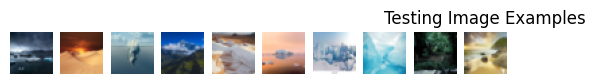

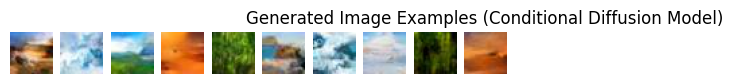

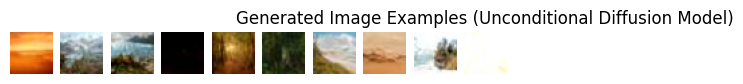

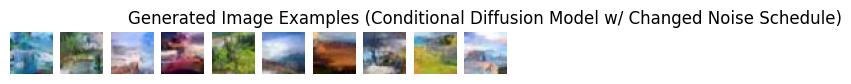

In [19]:
randIndices2 = random.sample(range(0,150), 10)

fig1,ax1 = plt.subplots(1,10)
plt.title('Testing Image Examples')
for i in range(10):
  ax1[i].axis('off')
  index = randIndices2[i]
  ax1[i].imshow(np.transpose(np.array(realImgX[index]), (1,2,0)))


fig2,ax2 = plt.subplots(1,10)
plt.title('Generated Image Examples (Conditional Diffusion Model)')
randIndices2 = random.sample(range(0,150), 10)
for i in range(10):
  ax2[i].axis('off')
  index = randIndices2[i]
  ax2[i].imshow(np.transpose(np.array(genImgX[index]), (1,2,0)))

fig3,ax3 = plt.subplots(1,10)
plt.title('Generated Image Examples (Unconditional Diffusion Model)')
for i in range(10):
  ax3[i].axis('off')
  index = randIndices2[i] 
  ax3[i].imshow(np.transpose(np.array(genUImgX[index]), (1,2,0)))

fig4,ax4 = plt.subplots(1,10)
plt.title('Generated Image Examples (Conditional Diffusion Model w/ Changed Noise Schedule)')
for i in range(10):
  ax4[i].axis('off')
  index = randIndices2[i] 
  ax4[i].imshow(np.transpose(np.array(genHPImgX[index]), (1,2,0)))

### Section 2: Performance on Unconditional Model Results

In [10]:
_ = torch.manual_seed(123)
fid = torchmetrics.image.fid.FrechetInceptionDistance(feature = 64, normalize=True)
fid.update(realImgX, real=True)
fid.update(genUImgX, real=False)

Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 108MB/s]


In [11]:
fid.compute()

tensor(3.4404)

### Section 3: Performance on Conditional Model Results

In [12]:
fid2 = torchmetrics.image.fid.FrechetInceptionDistance(feature = 64, normalize=True)

In [13]:
fid2.update(realImgX, real=True)
fid2.update(genImgX, real=False)

In [14]:
fid2.compute()

tensor(1.0769)

### Section 4: Performance on Conditional Model w/ Changed Noise Schedule

In [15]:
fid3 = torchmetrics.image.fid.FrechetInceptionDistance(feature = 64, normalize=True)

In [16]:
fid3.update(realImgX, real=True)
fid3.update(genHPImgX, real=False)

In [17]:
fid3.compute()

tensor(0.6136)